In [2]:
#1、导入包
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda,Compose
import matplotlib.pyplot as plt

In [14]:
#1、从Torchvision中直接拿去数据
train_data = datasets.KMNIST(root='data',train=True,\
                                   download=True,transform=ToTensor())
test_data = datasets.KMNIST(root='data',train=False,\
                                  download=True,transform=ToTensor())
batch_size = 64
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size)
#查看数据,就是包含了训练的数据和标签
for n,m in train_dataloader:
    print(n.shape,n.dtype)
    print(m.shape)
    break

torch.Size([64, 1, 28, 28]) torch.float32
torch.Size([64])


In [45]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
#2、定义神经网络
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.kpipeline = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)          
        )
    def forward(self,x):
        x = self.flatten(x)
        logits = self.kpipeline(x)
        return logits
model = NeuralNetwork()
print(model)

cpu
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (kpipeline): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [46]:
#3、定义模型损失函数和优化器
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)

In [47]:
#4、开始训练
def train(dataloader,model,loss,optimizer):
    model.train()
    for batch,(x,y) in enumerate(dataloader):
        x, y = x.to(device),y.to(device)
        pred= model(x)
        loss = loss_fn(pred, y)
        model.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            print(f'batch:{batch},loss:{loss:.6f}')

In [51]:
loss_list = []
cor_list = []
def test(dataloader,model,loss):
    size = len(dataloader.dataset) #数据样本总个数
    num_batches = len(dataloader)  #一共多少批次
    model.eval()
    test_loss,corrent = 0, 0
    with torch.no_grad():
        for batch,(x,y) in enumerate(dataloader):
            x, y = x.to(device),y.to(device)
            pred = model(x)
            test_loss += (loss_fn(pred, y)).item()  #用item()得到的是数值了就
            corrent +=((pred.argmax(dim=1))==y).type(torch.float).sum().item()
    test_loss /= num_batches #每个批次的损失相加后除以总批次就是每个批次的 平均损失
    corrent /=size           # 正确的个数 除以 总个数 就是准确率呀
    print(f'mean loss:{test_loss},Acc:{corrent}')
    loss_list.append(test_loss)
    cor_list.append(corrent)
    return loss_list,cor_list

In [52]:
# 6、训练查看结果 增加两层中间层和使用Adam优化器
epochs = 5
for i in range(epochs):
    print(f'当前epoch:{i}')
    train(train_dataloader,model,loss_fn,optimizer)
    test(test_dataloader,model,loss_fn)
print(f'训练结束')

当前epoch:0
batch:0,loss:0.005549
batch:100,loss:0.051228
batch:200,loss:0.083863
batch:300,loss:0.012749
batch:400,loss:0.021841
batch:500,loss:0.007278
batch:600,loss:0.176759
batch:700,loss:0.041206
batch:800,loss:0.034725
batch:900,loss:0.073579
mean loss:0.3901351562398634,Acc:0.9043
当前epoch:1
batch:0,loss:0.082484
batch:100,loss:0.002394
batch:200,loss:0.013528
batch:300,loss:0.012695
batch:400,loss:0.015970
batch:500,loss:0.004654
batch:600,loss:0.095030
batch:700,loss:0.009298
batch:800,loss:0.106560
batch:900,loss:0.144487
mean loss:0.39682370220210145,Acc:0.9073
当前epoch:2
batch:0,loss:0.089358
batch:100,loss:0.004191
batch:200,loss:0.000880
batch:300,loss:0.009232
batch:400,loss:0.002488
batch:500,loss:0.014571
batch:600,loss:0.022761
batch:700,loss:0.001651
batch:800,loss:0.045327
batch:900,loss:0.091456
mean loss:0.4139060653793584,Acc:0.9088
当前epoch:3
batch:0,loss:0.001968
batch:100,loss:0.028927
batch:200,loss:0.015891
batch:300,loss:0.003101
batch:400,loss:0.003133
batch:5

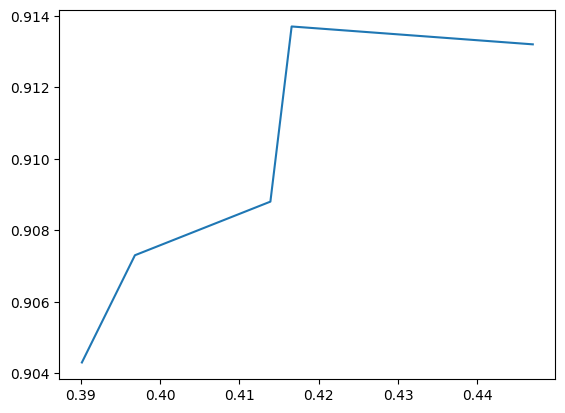

In [55]:
plt.plot(loss_list,cor_list)
plt.show()

In [44]:
#5、训练查看结果
epochs = 5
for i in range(epochs):
    print(f'当前epoch:{i}')
    train(train_dataloader,model,loss_fn,optimizer)
    test(test_dataloader,model,loss_fn)
print(f'训练结束')

当前epoch:0
batch:0,loss:2.315005
batch:100,loss:2.297826
batch:200,loss:2.307921
batch:300,loss:2.299068
batch:400,loss:2.293647
batch:500,loss:2.304108
batch:600,loss:2.293057
batch:700,loss:2.307006
batch:800,loss:2.305202
batch:900,loss:2.304445
mean loss:2.3045927551901264,Acc:0.1269
当前epoch:1
batch:0,loss:2.305893
batch:100,loss:2.305712
batch:200,loss:2.309381
batch:300,loss:2.300283
batch:400,loss:2.301201
batch:500,loss:2.304211
batch:600,loss:2.304339
batch:700,loss:2.297646
batch:800,loss:2.310352
batch:900,loss:2.311917
mean loss:2.3045927551901264,Acc:0.1269
当前epoch:2
batch:0,loss:2.300241
batch:100,loss:2.297178
batch:200,loss:2.307223
batch:300,loss:2.306372
batch:400,loss:2.301532
batch:500,loss:2.300491
batch:600,loss:2.306440
batch:700,loss:2.294038
batch:800,loss:2.308191
batch:900,loss:2.318787
mean loss:2.3045927551901264,Acc:0.1269
当前epoch:3
batch:0,loss:2.303449
batch:100,loss:2.298046
batch:200,loss:2.300879
batch:300,loss:2.301942
batch:400,loss:2.314949
batch:50

In [5]:
test_data

Dataset KMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()